# 高寒 17353019

In [42]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## hw 3.1

### (1)

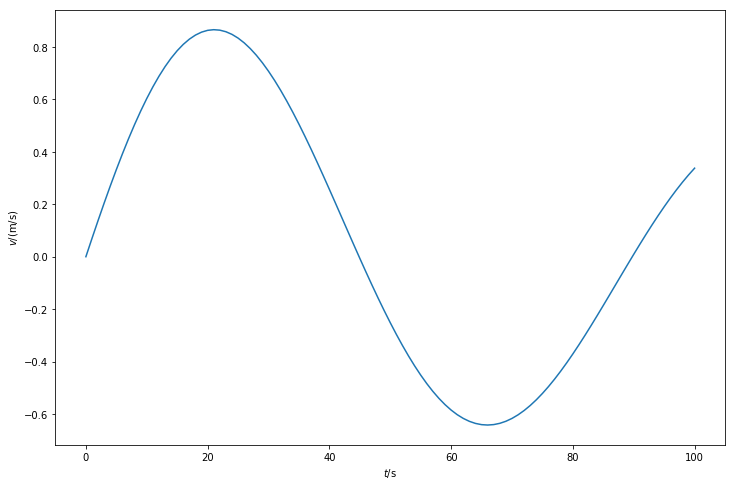

In [43]:
data = np.loadtxt('hw3/velocities.txt')
t,v = data[:,0],data[:,1]
plt.figure(figsize=(12,8))
plt.plot(t,v)
plt.xlabel('$t$/s')
plt.ylabel('$v$/(m/s)')
plt.show()

### (2)

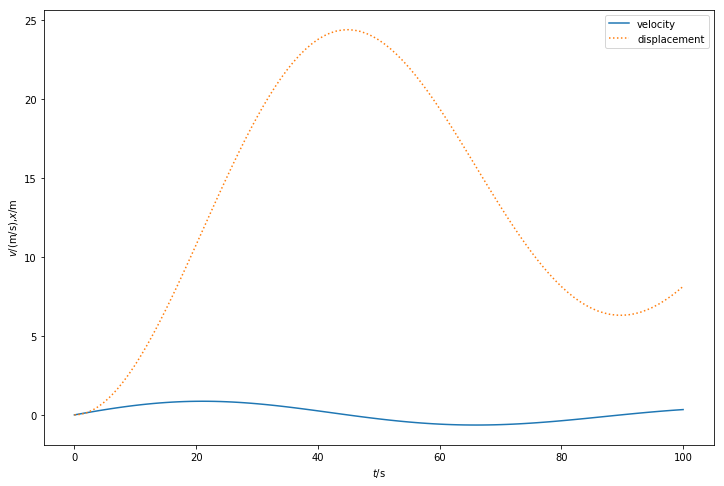

In [44]:
n = t.size
l = np.zeros(n)
total_time = t[-1]-t[0]
dt = total_time/n
for i in range(n):
    if i == 0:
        l[i] = 0
    else:
        l[i] = l[i-1] + dt*(v[i-1] + v[i])/2

plt.figure(figsize=(12,8))
plt.plot(t,v,label='velocity')
plt.plot(t,l,linestyle=':',label='displacement')
plt.xlabel('$t$/s')
plt.ylabel('$v$/(m/s),$x$/m')
plt.legend()
plt.show()

## hw 3.2

In [45]:
def t_integral(func,a,b,n=100):
    h = (b-a)/n
    return h*((func(a) + func(b))/2 + sum([func(a+h*k) for k in range(1,n)]))

def s_integral(func,a,b,n=100):
    h = (b-a)/n
    return (func(a) + func(b) + 4*sum([func(a+k*h) for k in range(1,n,2)]) + 2*sum([func(a+k*h) for k in range(2,n,2)]))*h/3

In [46]:
def f(x):
    return x**4 - 2*x + 1

exact = 4.4
for n in [10,100,1000]:
    tint = t_integral(f,0,2,n)
    sint = s_integral(f,0,2,n)
    terr = np.abs(tint-exact)/exact
    serr = np.abs(sint-exact)/exact
    print('n =' + str(n))
    print('\ttrape int = ' + str(tint) + '\terr = ' + str(terr) )
    print('\tsimp int = ' + str(sint) + '\terr = ' + str(serr) )

n =10
	trape int = 4.50656	err = 0.024218181818181812
	simp int = 4.400426666666668	err = 9.696969696992851e-05
n =100
	trape int = 4.401066656	err = 0.00024242181818179273
	simp int = 4.400000042666667	err = 9.69696969186564e-09
n =1000
	trape int = 4.400010666665601	err = 2.424242181947084e-06
	simp int = 4.400000000004267	err = 9.697293473271367e-13


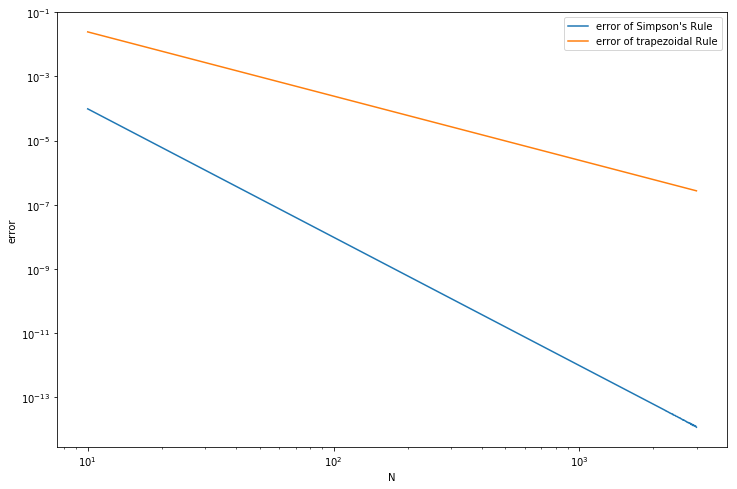

In [47]:
serrvals = []
terrvals = []
nvals = list(range(10,3000,10))
for n in nvals:
    tint = t_integral(f,0,2,n)
    sint = s_integral(f,0,2,n)
    terr = np.abs(tint-exact)/exact
    serr = np.abs(sint-exact)/exact
    serrvals.append(serr)
    terrvals.append(terr)
plt.figure(figsize=(12,8))
plt.plot(nvals,serrvals,label="error of Simpson's Rule")
plt.plot(nvals,terrvals,label="error of trapezoidal Rule")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('error')
plt.legend()
plt.show()

## hw 3.3

### (1)

In [48]:
def g(x):
    return np.exp(-x**2)
dx = 0.1
evals = []
ex = 0
for i in range(31):
    evals.append(ex)
    ex += s_integral(g,i*dx,(i+1)*dx,n=20)
print(evals)

[0, 0.09966766429443419, 0.1973650309341642, 0.2912378826677046, 0.37965283971316316, 0.46128100642631364, 0.535153526821335, 0.6006856680947759, 0.657669856338473, 0.7062415149712138, 0.7468241328175365, 0.7800614325792117, 0.8067447581235925, 0.8277429893919372, 0.8439407138391438, 0.8561883936216073, 0.8652662259386527, 0.871861593403013, 0.8765586342557524, 0.8798376097170736, 0.8820813907598778, 0.8835864418763636, 0.8845760209038924, 0.8852138115704121, 0.8856167458981077, 0.8858662736168941, 0.8860177453970557, 0.8861078761613564, 0.886160446739687, 0.8861905034064832, 0.8862073482594439]


### (2)

In [49]:
dx = 0.1
evals = []
xvals = [dx*i for i in range(1001)]
ex = 0
for i in range(1001):
    evals.append(ex)
    ex += s_integral(g,i*dx,(i+1)*dx,n=20)

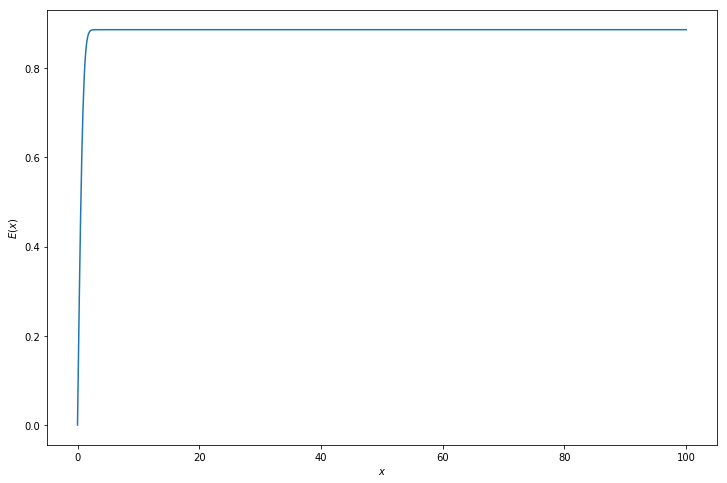

In [50]:
plt.figure(figsize=(12,8))
plt.plot(xvals,evals)
plt.xlabel('$x$')
plt.ylabel('$E(x)$')
plt.show()

## hw 3.4

### (1)

In [51]:
def J(m,x):
    def ker(t):
        return np.cos(m*t-x*np.sin(t))/np.pi
    return s_integral(ker,0,np.pi,n=1000)

xvals = [0.05*k for k in range(401)]
j0 = []
for x in xvals:
    j0.append(J(0,x))
j1 = []
for x in xvals:
    j1.append(J(1,x))
j2 = []
for x in xvals:
    j2.append(J(2,x))

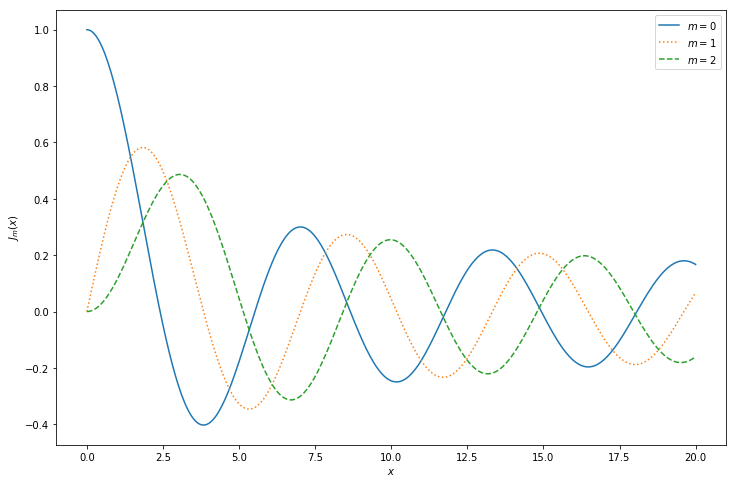

In [52]:
plt.figure(figsize=(12,8))
plt.plot(xvals,j0,label='$m=0$')
plt.plot(xvals,j1,label='$m=1$',linestyle=':')
plt.plot(xvals,j2,label='$m=2$',linestyle='--')
plt.xlabel('$x$')
plt.ylabel('$J_m(x)$')
plt.legend()
plt.show()

### (2)

In [53]:
um = 1 #define 1 \mu m = 1
k = 2*np.pi/(0.5*um)
def I(r):
    if r < um/1e5:
        return 1/4
    else:
        return (J(1,k*r)/(k*r))**2

def polar_r(x,y):
    return np.sqrt(x**2 + y**2)

xvals = np.linspace(-1*um,1*um,200)
yvals = np.linspace(-1*um,1*um,200)
intensity = np.zeros((200,200))
for i in range(200):
    for j in range(200):
        intensity[i][j] = I(polar_r(xvals[i],yvals[j]))

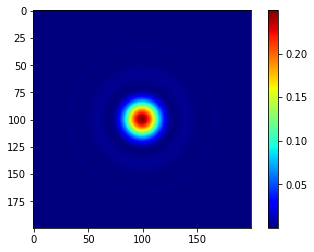

<Figure size 432x288 with 0 Axes>

In [54]:
mesh = np.meshgrid(xvals,yvals)
plt.imshow(intensity)
plt.colorbar()
plt.jet()
plt.show()
plt.savefig('2dariy.pdf')

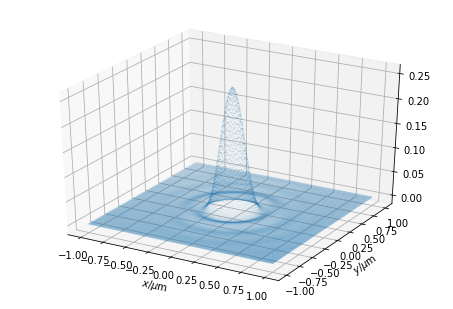

<Figure size 432x288 with 0 Axes>

In [55]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
X, Y = np.meshgrid(xvals, yvals)
plt.xlabel('$x/\\mu$m')
plt.ylabel('$y/\\mu$m')
ax.scatter(X, Y, intensity, 'green-', s = 0.01)
plt.show()
plt.savefig('3dariy.pdf')

## hw 3.5

### a)

In [56]:
print('n\tapprox_value\t\terror')
eps = 1e-6
def fhw35(x):
    return np.sin(np.sqrt(100*x))**2

approx_last = 0.
error = 1.
n = 1
while error > eps:
    approx_now = t_integral(fhw35,0,1,n)
    error = np.abs(approx_now - approx_last)/approx_now
    print(str(n)+'\t'+str(approx_now)+'\t'+str(error))
    approx_last = approx_now
    n = n*2
    

n	approx_value		error
1	0.14797948454665205	1.0
2	0.3252319078064746	0.5450031777487666
4	0.5122828507233315	0.3651321582456748
8	0.40299744847824825	0.2711813751123089
16	0.43010336929474696	0.06302187509236461
32	0.4484146657874699	0.040835632484424025
64	0.45391293121537585	0.012113039858071545
128	0.45534850437280217	0.0031526910567185864
256	0.45571126645324106	0.0007960349175964821
512	0.4558021996516641	0.00019950144710251296
1024	0.4558249481324202	4.990617746861428e-05
2048	0.45583063620164616	1.2478470673580951e-05
4096	0.4558320582782707	3.1197380674366536e-06
8192	0.45583241380113443	7.799420421631531e-07


### b)

In [57]:
print('n\tapprox_value\t\terror')
eps = 1e-6
def fhw35(x):
    return np.sin(np.sqrt(100*x))**2

approx_last = 0.
error = 1.
n = 2
while error > eps:
    approx_now = s_integral(fhw35,0,1,n)
    error = np.abs(approx_now - approx_last)/approx_now
    print(str(n)+'\t'+str(approx_now)+'\t'+str(error))
    approx_last = approx_now
    n = n*2
    

n	approx_value		error
2	0.38431604889308213	1.0
4	0.5746331650289503	0.33119758433413765
8	0.3665689810632206	0.5675989914974442
16	0.4391386762335799	0.16525462023244591
32	0.4545184312850443	0.033837472790667227
64	0.45574568635801116	0.002692850661460275
128	0.45582702875861086	0.00017845014768262074
256	0.45583218714672075	1.131641918963989e-05
512	0.4558325107178051	7.098464386869284e-07


## 3.6

### a)
The total radiative energy is given by
$$ W = \int_0^\infty I(\omega) d\omega = \frac{\hbar}{4\pi^2 c^2} \int_0^\infty \frac{\omega^3}{e^{\hbar \omega/k_B T} -1} d\omega. $$
Letting $x = \hbar \omega/k_B T$, we have $\omega = k_B T x/\hbar$, which yields
$$
W = \frac{\hbar}{4\pi^2 c^2}\left(\frac{k_B T}{\hbar}\right)^4 \int_0^\infty \frac{x^3}{e^{x} -1} dx = \frac{k_B^4 T^4}{4\pi^2c^2 \hbar^3 }\int_0^\infty \frac{x^3}{e^{x} -1} dx.
$$

### b) c)
Let $ z = \frac{x}{1+x} $ or $ x= \frac{z}{1-z}$. The integral above can be deformed into
$$
\int_0^\infty \frac{x^3}{e^{x} -1} dx = \int_0^1 \frac{\left(\frac{z}{1-z}\right)^3}{e^{\frac{z}{1-z}} - 1} \frac{dz}{(1-z)^2}
$$

In [58]:
from gaussxw import gaussxw
def p(z):
    return (z/(1-z))**3/((1-z)**2*(np.exp(z/(1-z))-1))

def g_integral(func,a,b,n=100):
    x, w = gaussxw(n)
    xp = 0.5*(b-a)*x + 0.5*(b+a)
    wp = 0.5*(b-a)*w
    s = sum([func(xp[k])*wp[k] for k in range(n)])
    return s

k, c, hbar = 1.380649e-23, 299792458., 1.054571817e-34

sigma = k**4/(4*np.pi**2*c**2*hbar**3)*g_integral(p,0,1,100)
true_sigma = 5.670374419e-8
print(sigma,true_sigma)

5.670374429607472e-08 5.670374419e-08


## 选做

### a)
平面上的点$(x,y)$到点$z$的位矢为$\vec{r} = (-x,-y,z)$，引力为
$$
\vec{F} = G \int_S \frac{\sigma dx dy \vec{r}}{|\vec{r}|^3} = G\sigma \int_S \frac{(-x,-y,z)}{(x^2+y^2+z^2)^{3/2}}
$$
由于积分范围关于$x,y$两轴对称，$\propto x$和$\propto y$的分量都为零。引力的唯一非零分量
$$
F_z= G\sigma z \int_S \frac{1}{(x^2+y^2+z^2)^{3/2}} dx dy
$$

### b)

In [59]:
l = 10.
def double_g_integral(func,x1,x2,y1,y2,n=100):
    x, w = gaussxw(n)
    xp = 0.5*(x2-x1)*x + 0.5*(x1+x2)
    yp = 0.5*(y2-y1)*x + 0.5*(y1+y2)
    wx = 0.5*(x2-x1)*w
    wy = 0.5*(y2-y1)*w
    s = 0
    for i in range(n):
        sy = 0
        for j in range(n):
            sy += wy[j]*func(xp[i],yp[j])
        s += wx[i]*sy
    return s


In [60]:
def fz(z):    
    def gz(x,y):
        return 1/(x**2 + y**2 + z**2)**(1.5)
    return z*double_g_integral(gz,-l/2,l/2,-l/2,l/2)

zvals = np.linspace(0,10,200)
fzvals = []
for nowz in zvals:
    fzvals.append(fz(nowz))

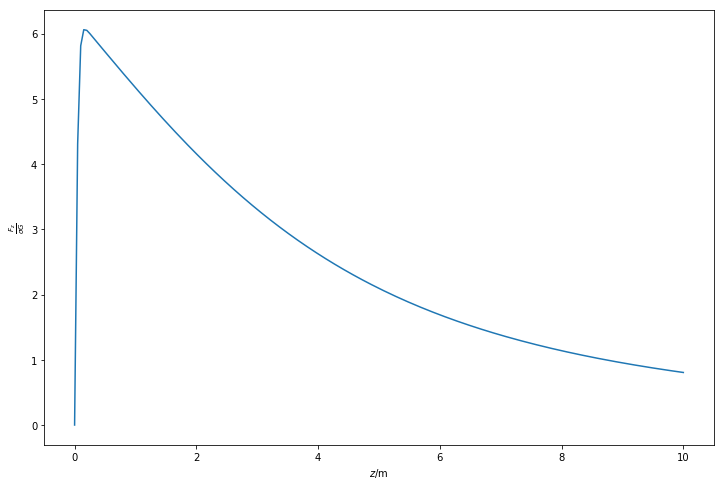

In [61]:
plt.figure(figsize=(12,8))
plt.plot(zvals,fzvals)
plt.xlabel('$z$/m')
plt.ylabel('$\\frac{F_z}{\sigma G}$')
plt.show()

### c)
在$z=0$附近取密一些的点

In [62]:
smallzvals = np.linspace(0,0.2,200)
largezvals = np.linspace(0.2,10,200)
zvals = np.hstack((smallzvals,largezvals))
fzvals = []
for nowz in zvals:
    fzvals.append(fz(nowz))

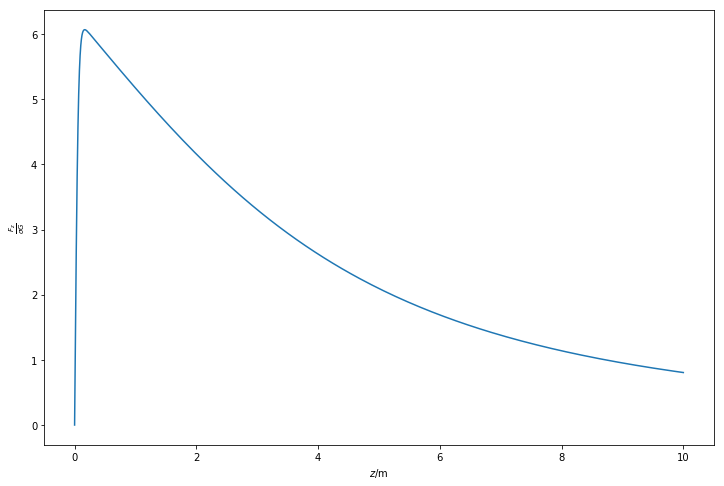

In [63]:
plt.figure(figsize=(12,8))
plt.plot(zvals,fzvals)
plt.xlabel('$z$/m')
plt.ylabel('$\\frac{F_z}{\sigma G}$')
plt.show()